Коэффициент корреляции Пирсона: -1.0


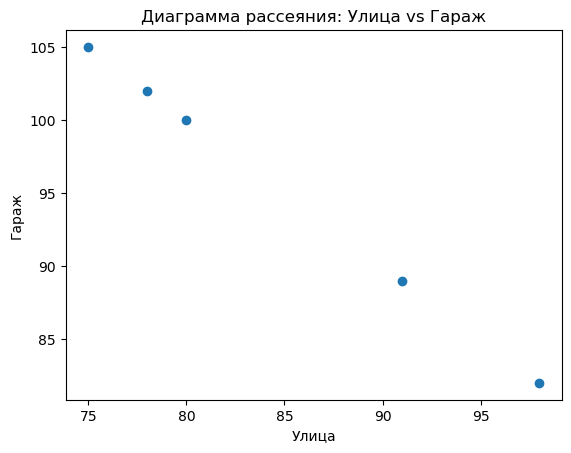

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Задание 1: Корреляция между уличной стоянкой и гаражом
# Данные по количеству автомобилей
street = [80, 98, 75, 91, 78]
garage = [100, 82, 105, 89, 102]

# 1.1 Корреляция Пирсона
correlation, p_value = stats.pearsonr(street, garage)
print(f"Коэффициент корреляции Пирсона: {correlation}")

# 1.2 Диаграмма рассеяния
plt.scatter(street, garage)
plt.xlabel("Улица")
plt.ylabel("Гараж")
plt.title("Диаграмма рассеяния: Улица vs Гараж")
plt.show()


In [2]:
# Задание 2: Корреляционная матрица и линейная регрессия
# 2.1 Загрузка и предобработка данных (используем Housing.csv)
data = pd.read_csv('data/Housing.csv')
print(data.head())

# Исключение нечисловых столбцов
numeric_data = data.select_dtypes(include=[np.number])

# Описание признаков
print(data.describe())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

In [3]:
# 2.2 Корреляционная матрица и выбор переменной
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Определение наиболее коррелирующей переменной с 'price'
target_variable = 'price'
most_correlated = correlation_matrix[target_variable].abs().sort_values(ascending=False).index[1]
print(f"Наиболее коррелирующая переменная с '{target_variable}': {most_correlated}")

              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.535997  0.366494   0.517545  0.420712  0.384394
area       0.535997  1.000000  0.151858   0.193820  0.083996  0.352980
bedrooms   0.366494  0.151858  1.000000   0.373930  0.408564  0.139270
bathrooms  0.517545  0.193820  0.373930   1.000000  0.326165  0.177496
stories    0.420712  0.083996  0.408564   0.326165  1.000000  0.045547
parking    0.384394  0.352980  0.139270   0.177496  0.045547  1.000000
Наиболее коррелирующая переменная с 'price': area


In [4]:
# 2.3 Реализация линейной регрессии вручную
x = data[most_correlated]
y = data[target_variable]

# Расчет коэффициентов линейной регрессии
x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x - x_mean) * (y - y_mean))
denominator = np.sum((x - x_mean) ** 2)

slope = numerator / denominator
intercept = y_mean - slope * x_mean

# Расчет MSE
y_pred = slope * x + intercept
mse = np.mean((y - y_pred) ** 2)

print(f"Наклон (slope): {slope}")
print(f"Сдвиг (intercept): {intercept}")
print(f"Среднеквадратичная ошибка (MSE): {mse}")

Наклон (slope): 461.9748942727835
Сдвиг (intercept): 2387308.48239643
Среднеквадратичная ошибка (MSE): 2488861398180.6567


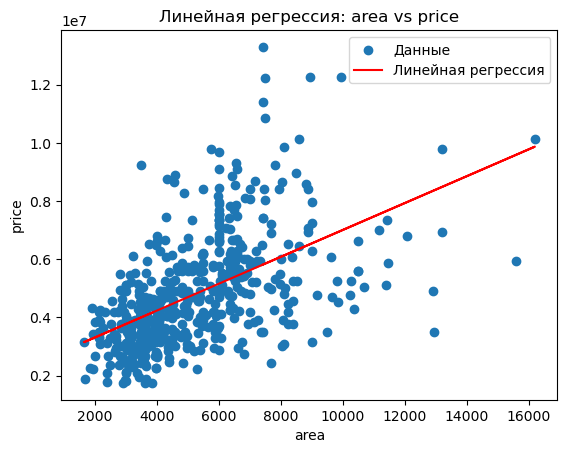

In [5]:
# 2.4 Визуализация линейной регрессии
plt.scatter(x, y, label='Данные')
plt.plot(x, y_pred, color='red', label='Линейная регрессия')
plt.xlabel(most_correlated)
plt.ylabel(target_variable)
plt.title(f'Линейная регрессия: {most_correlated} vs {target_variable}')
plt.legend()
plt.show()

In [6]:
# Задание 3: ANOVA анализ
# 3.1 Загрузка и предобработка данных (используем insurance.csv)
insurance_data = pd.read_csv('data/insurance.csv')
print(insurance_data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [7]:
# 3.2 Однофакторный ANOVA тест (Scipy)
regions = insurance_data['region'].unique()
bmi_groups = [insurance_data[insurance_data['region'] == region]['bmi'] for region in regions]

f_stat, p_value = stats.f_oneway(*bmi_groups)
print(f"ANOVA (Scipy) - F-статистика: {f_stat}, p-значение: {p_value}")

ANOVA (Scipy) - F-статистика: 39.49505720170283, p-значение: 1.881838913929143e-24


In [8]:
# 3.3 Однофакторный ANOVA тест (statsmodels)
model = ols('bmi ~ C(region)', data=insurance_data).fit()
anova_results = anova_lm(model)
print(anova_results)

               df        sum_sq      mean_sq          F        PR(>F)
C(region)     3.0   4055.880631  1351.960210  39.495057  1.881839e-24
Residual   1334.0  45664.319755    34.231124        NaN           NaN


In [9]:
pairs = [(r1, r2) for i, r1 in enumerate(regions) for r2 in regions[i + 1:]]
alpha = 0.05 / len(pairs)  # Поправка Бонферрони

for r1, r2 in pairs:
    group1 = insurance_data[insurance_data['region'] == r1]['bmi']
    group2 = insurance_data[insurance_data['region'] == r2]['bmi']
    t_stat, p_val = stats.ttest_ind(group1, group2)
    print(f"t-тест для {r1} и {r2}: t-статистика = {t_stat}, p-значение = {p_val} (поправка Бонферрони: {alpha})")

t-тест для southwest и southeast: t-статистика = -5.908373821545118, p-значение = 5.4374009639680636e-09 (поправка Бонферрони: 0.008333333333333333)
t-тест для southwest и northwest: t-статистика = 3.2844171500398582, p-значение = 0.001076958496307695 (поправка Бонферрони: 0.008333333333333333)
t-тест для southwest и northeast: t-статистика = 3.1169000930045923, p-значение = 0.0019086161671573072 (поправка Бонферрони: 0.008333333333333333)
t-тест для southeast и northwest: t-статистика = 9.25649013552548, p-значение = 2.643571405230106e-19 (поправка Бонферрони: 0.008333333333333333)
t-тест для southeast и northeast: t-статистика = 8.790905562598699, p-значение = 1.186014937424813e-17 (поправка Бонферрони: 0.008333333333333333)
t-тест для northwest и northeast: t-статистика = 0.060307727183293185, p-значение = 0.951929170821864 (поправка Бонферрони: 0.008333333333333333)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


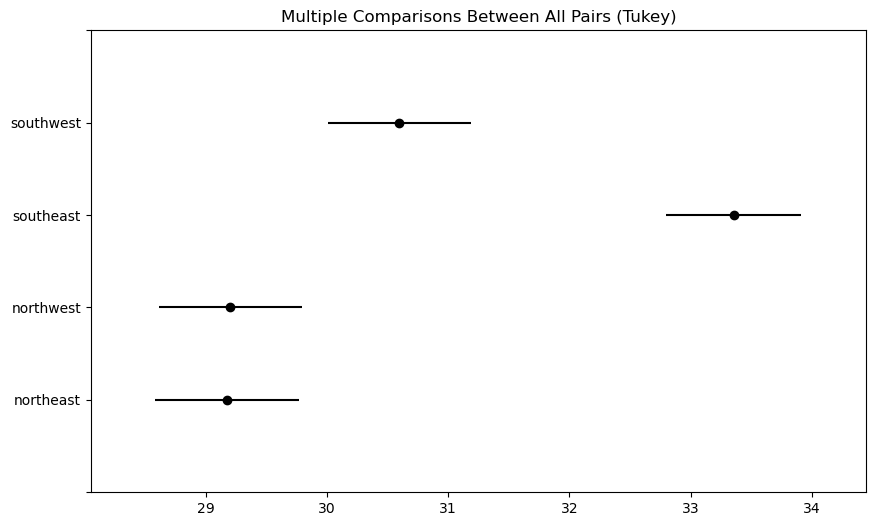

In [10]:
# 3.5 Пост-хок тесты Тьюки и построение графика
posthoc = pairwise_tukeyhsd(insurance_data['bmi'], insurance_data['region'])
print(posthoc)
posthoc.plot_simultaneous()
plt.show()

In [11]:
# 3.6 Двухфакторный ANOVA тест (region и sex)
model = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data=insurance_data).fit()
anova_results_two_way = anova_lm(model)
print(anova_results_two_way)

                      df        sum_sq      mean_sq          F        PR(>F)
C(region)            3.0   4055.880631  1351.960210  39.602259  1.636858e-24
C(sex)               1.0     86.007035    86.007035   2.519359  1.126940e-01
C(region):C(sex)     3.0    174.157808    58.052603   1.700504  1.650655e-01
Residual          1330.0  45404.154911    34.138462        NaN           NaN


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263 0.9999 -1.1552  1.2078  False
northeast southeast   4.1825    0.0   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest southeast   4.1562    0.0  3.0077  5.3047   True
northwest southwest   1.3968 0.0127  0.2162  2.5774   True
southeast southwest  -2.7594    0.0 -3.9079 -1.6108   True
----------------------------------------------------------


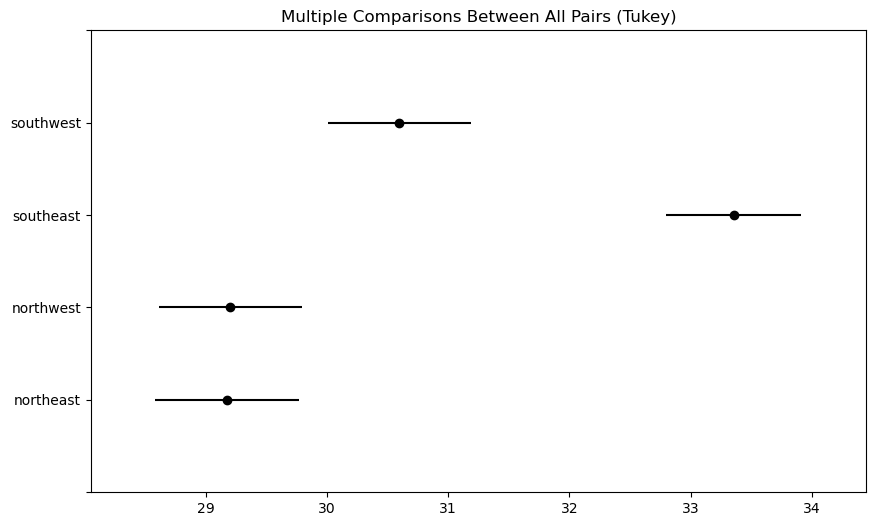

In [14]:
# 3.7 Пост-хок тесты Тьюки для двухфакторного анализа
# Повторим тест Тьюки, так как взаимодействие region и sex
posthoc_two_way = pairwise_tukeyhsd(insurance_data['bmi'], insurance_data['region'])
print(posthoc_two_way)
posthoc_two_way.plot_simultaneous()
plt.show()
